# Taxonomy of microbial populations based on GTDB and GreenGenes

The original study of Wallace et al (2018) has GreenGenes identifiers assigned to OTUs.

We recently used a Qiime 2 classifier to assign GTDB identifiers to the same OTUs.

This notebook describes taxonomy associated with subset of OTUs used in co-occurrence and cross-correlation networks.

Importing taxonomy and one of the matrices with filtered OTUs:

In [19]:
import pandas as pd

greengenes_taxonomy = pd.read_table("/home/renato/projects/fapesp_bepe_pd/microbiome/2f_otu_table.sample_filtered.no_mitochondria_chloroplast.taxonomy.txt", sep="\t", header=None)
greengenes_taxonomy.columns = ['OTU_ID', 'Taxonomy', 'Confidence', 'Rank']
gtdb_taxonomy = pd.read_table("/home/renato/projects/fapesp_bepe_pd/microbiome/gtdb_taxonomy.tsv", sep="\t", header=None)
gtdb_taxonomy.columns = ['OTU_ID', 'Taxonomy', 'Confidence']

In [20]:
filtered_dataset_day = pd.read_table("/home/renato/projects/fapesp_bepe_pd/microbiome/filtered_otu_table_day_filtered_rel_abund_cv_filtered.tsv",
                                     sep="\t", header=0, index_col=0)
filtered_dataset_day.head()

,14A0247_8,14A0051_8,14A0381_26,14A0533_26,14A0295_8,14A0169_26,14A0069_8,14A0497_26,14A0023_8,14A0547_26,...,14A0345_8,14A0267_8,14A0009_8,14A0007_8,14A0093_26,14A0137_26,14A0265_8,14A0155_26,14A0167_26,14A0481_26
OTU_ID,,,,,,,,,,,,,,,,,,,,,
969149,0.0,21.0,10.0,1.0,2.0,30.0,0.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3486915,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
808437,1.0,15.0,2.0,41.0,0.0,7.0,3.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0
750840,0.0,0.0,4.0,9.0,1.0,1.0,0.0,2.0,7.0,18.0,...,0.0,0.0,1.0,16.0,0.0,2.0,2.0,0.0,2.0,3.0
542475,0.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,72.0,0.0,0.0,0.0,1.0,8.0,0.0


Filtering the GTDB OTU taxonomy based on the day dataframe:

In [38]:
filtered_gtdb_taxonomy = gtdb_taxonomy[gtdb_taxonomy['OTU_ID'].isin(filtered_dataset_day.index)]
filtered_gtdb_taxonomy.head()

,OTU_ID,Taxonomy,Confidence
19,1007180,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.999141
85,1024188,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.903868
132,1039092,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.975254
180,1048878,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.999944
266,107137,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.998423


In [39]:
def extract_genus(taxonomy):
    fields = taxonomy.split(';')
    for field in fields:
        if field.strip().startswith('g_'):
            return field.replace('g__', '').strip()
    return "Unknown Genus"

def extract_order(taxonomy):
    fields = taxonomy.split(';')
    for field in fields:
        if field.strip().startswith('o_'):
            return field.replace('o__', '').strip()
    return "Unknown Order"

def extract_family(taxonomy):
    fields = taxonomy.split(';')
    for field in fields:
        if field.strip().startswith('f_'):
            return field.replace('f__', '').strip()
    return "Unknown Family"

filtered_gtdb_taxonomy['Genus'] = filtered_gtdb_taxonomy['Taxonomy'].apply(extract_genus)
filtered_gtdb_taxonomy['Order'] = filtered_gtdb_taxonomy['Taxonomy'].apply(extract_order)
filtered_gtdb_taxonomy['Family'] = filtered_gtdb_taxonomy['Taxonomy'].apply(extract_family)

filtered_gtdb_taxonomy.head()

/tmp/ipykernel_64390/2602326514.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gtdb_taxonomy['Genus'] = filtered_gtdb_taxonomy['Taxonomy'].apply(extract_genus)
/tmp/ipykernel_64390/2602326514.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gtdb_taxonomy['Order'] = filtered_gtdb_taxonomy['Taxonomy'].apply(extract_order)
/tmp/ipykernel_64390/2602326514.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,OTU_ID,Taxonomy,Confidence,Genus,Order,Family
19,1007180,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.999141,Methylobacterium,Rhizobiales,Beijerinckiaceae
85,1024188,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.903868,Sphingomonas,Sphingomonadales,Sphingomonadaceae
132,1039092,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.975254,Chryseobacterium,Flavobacteriales,Weeksellaceae
180,1048878,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.999944,Unknown Genus,Burkholderiales,Burkholderiaceae_B
266,107137,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,0.998423,Methylobacterium,Rhizobiales,Beijerinckiaceae


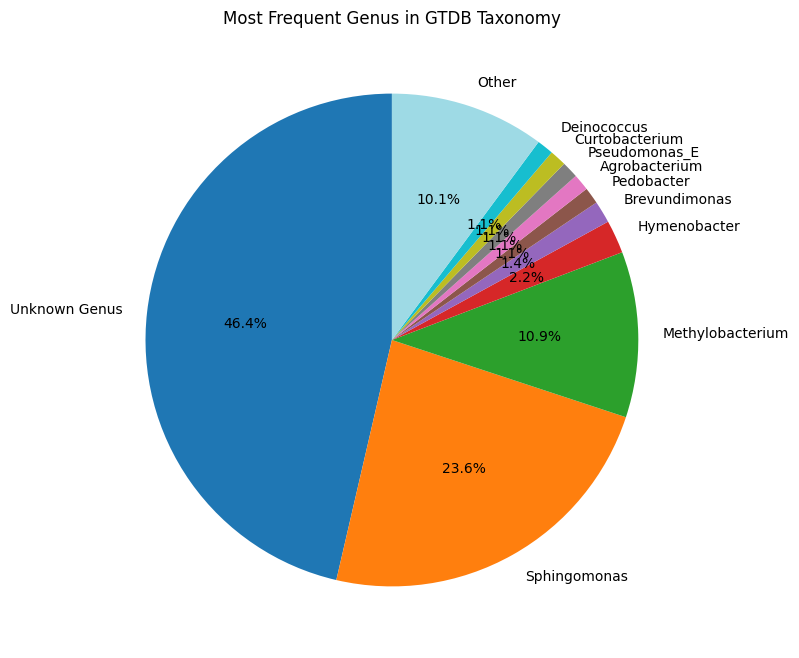

In [41]:
import matplotlib.pyplot as plt

# Number of top genera to display
top_n = 10

# Get the counts of each genus
genus_counts = filtered_gtdb_taxonomy['Genus'].value_counts()

# Get the top N most frequent genera
top_genus_counts = genus_counts.head(top_n)

# Group the rest into an "Other" category
other_count = genus_counts[top_n:].sum()
top_genus_counts['Other'] = other_count

# Plot the pie chart
plt.figure(figsize=(10, 8))
top_genus_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', labels=top_genus_counts.index)
plt.ylabel('')
plt.title('Most Frequent Genus in GTDB Taxonomy')
plt.show()

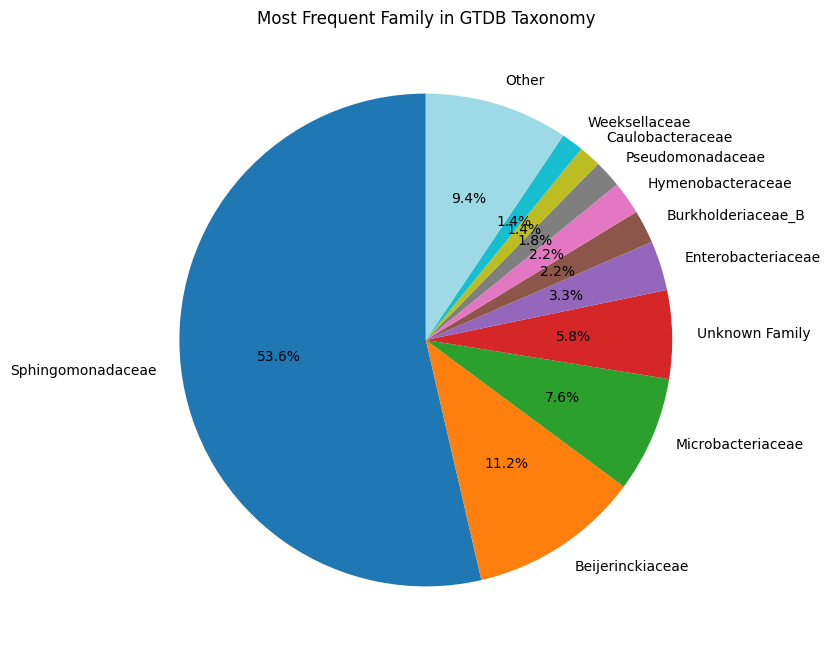

In [42]:
import matplotlib.pyplot as plt

# Number of top genera to display
top_n = 10

# Get the counts of each family
family_counts = filtered_gtdb_taxonomy['Family'].value_counts()

# Get the top N most frequent genera
top_family_counts = family_counts.head(top_n)

# Group the rest into an "Other" category
other_count = family_counts[top_n:].sum()
top_family_counts['Other'] = other_count

# Plot the pie chart
plt.figure(figsize=(10, 8))
top_family_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', labels=top_family_counts.index)
plt.ylabel('')
plt.title('Most Frequent Family in GTDB Taxonomy')
plt.show()

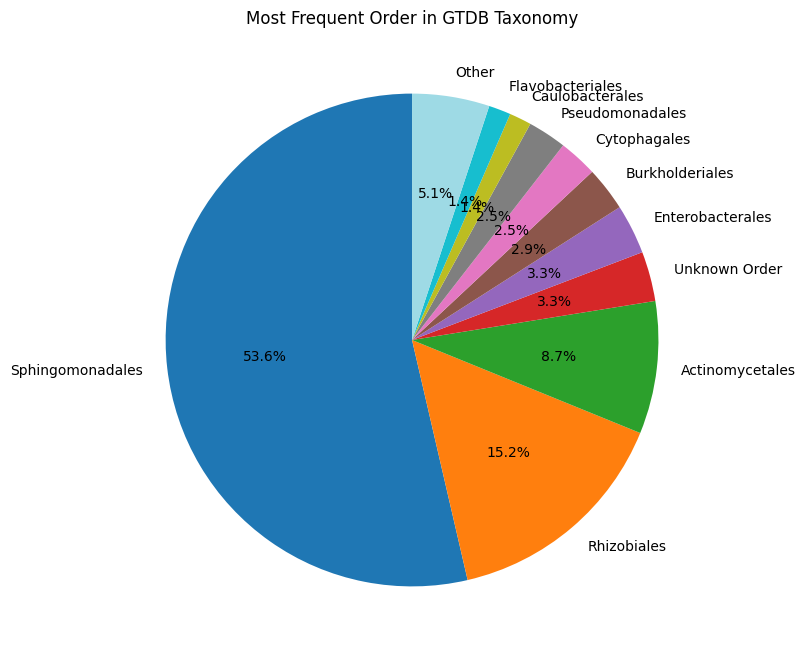

In [43]:
import matplotlib.pyplot as plt

# Number of top genera to display
top_n = 10

# Get the counts of each order
order_counts = filtered_gtdb_taxonomy['Order'].value_counts()

# Get the top N most frequent genera
top_order_counts = order_counts.head(top_n)

# Group the rest into an "Other" category
other_count = order_counts[top_n:].sum()
top_order_counts['Other'] = other_count

# Plot the pie chart
plt.figure(figsize=(10, 8))
top_order_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', labels=top_order_counts.index)
plt.ylabel('')
plt.title('Most Frequent Order in GTDB Taxonomy')
plt.show()